In [2]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.9 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np
import wfdb
import ast

path = '/home/gilberto/projects/data/ptb-diagnostic-ecg-database-1.0.0'

In [ ]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [16]:
signal, meta = wfdb.rdsamp('./00001_lr')
signal

array([[-0.119, -0.055,  0.064, ..., -0.026, -0.039, -0.079],
       [-0.116, -0.051,  0.065, ..., -0.031, -0.034, -0.074],
       [-0.12 , -0.044,  0.076, ..., -0.028, -0.029, -0.069],
       ...,
       [ 0.069,  0.   , -0.069, ...,  0.024, -0.041, -0.058],
       [ 0.086,  0.004, -0.081, ...,  0.242, -0.046, -0.098],
       [ 0.022, -0.031, -0.054, ...,  0.143, -0.035, -0.12 ]])

In [18]:
signal.shape

(1000, 12)

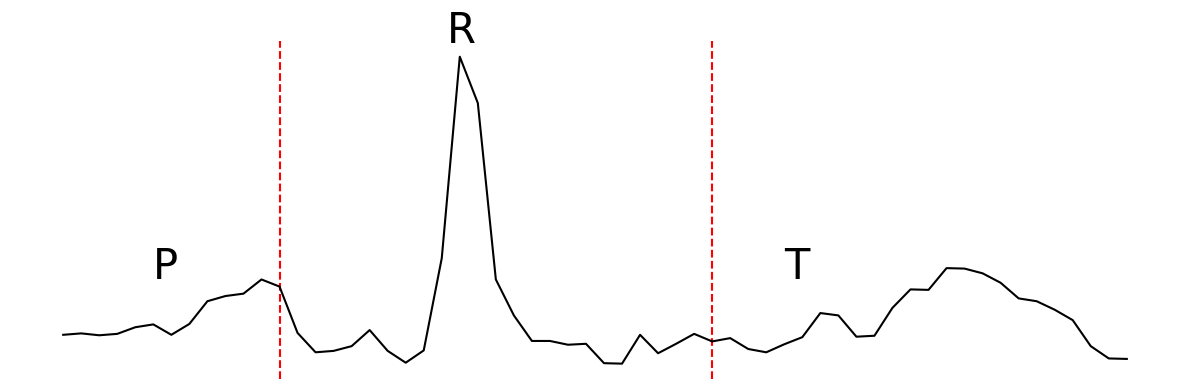

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.axvline(x=12, color='red', linestyle='dashed')
plt.axvline(x=36, color='red', linestyle='dashed')
plt.plot(signal[:60, 0], linewidth=1.5, color='black')

plt.text(5, 0, r'P', fontsize=30)
plt.text(21.3, 0.5, r'R', fontsize=30)
plt.text(40, 0.0, r'T', fontsize=30)

plt.axis('off')
plt.tight_layout()
plt.savefig('ptb_ecg_example.pdf')